# 1-Loading the Pickle files

In [121]:
import pandas as pd
import os

#List of all pickle files
pklfiles = [f for f in os.listdir('processed') if os.path.isfile(os.path.join('processed', f)) and f.endswith('.pkl')]
print(pklfiles)

['ad-ps.pkl', 'il-be.pkl']


In [122]:
video = 'il-be'
data = pd.read_pickle(os.path.join('processed', video + '.pkl'))

#Print first lines
data.head() 

filename                                         detections  \
0  img00116.jpeg  [[233, 59, 812, 660, person, 0.953125], [1070,...   
1  img01657.jpeg  [[644, 31, 633, 686, person, 0.9375], [2, 38, ...   
2  img00589.jpeg  [[174, 31, 931, 697, person, 0.89453125], [107...   
3  img00264.jpeg  [[238, 65, 671, 648, person, 0.7890625], [1019...   
4  img00070.jpeg  [[625, 38, 646, 673, person, 0.94921875], [0, ...   

                                               poses  \
0  [[[0.5942164659500122, 0.3633309602737427, -0....   
1  [[[0.23014520108699799, 0.3499877452850342, -0...   
2  [[[0.7177702188491821, 0.3628751039505005, -0....   
3  [[[0.5248920321464539, 0.42994266748428345, -0...   
4  [[[0.26123395562171936, 0.37553882598876953, -...   

                                               faces  \
0  [[[0.5915921926498413, 0.4152798652648926, -0....   
1  [[[0.23121432960033417, 0.40984055399894714, -...   
2  [[[0.7185059785842896, 0.41559118032455444, -0...   
3  [[[0.5052233934402466, 0.47179004549980164, -0...   
4  [[[0.715180516242981, 0.41563287377357483, -0....   

                         text  \
0     [3, IMAGENS CNN, [2624]   
1        [IMAGENS CNN, [2524]   
2  [3, IMAGENS CNN, ª, [2524]   
3      [3, IMAGENS CNN, 7224]   
4        [IMAGENS CNN, 82524]   

                                           embedding  \
0  [253, 0, 255, 255, 254, 254, 0, 253, 1, 8, 0, ...   
1  [253, 5, 4, 0, 0, 253, 253, 253, 4, 2, 0, 5, 0...   
2  [254, 1, 0, 1, 1, 1, 2, 253, 8, 0, 0, 5, 1, 4,...   
3  [0, 3, 0, 3, 0, 3, 255, 254, 1, 2, 0, 4, 255, ...   
4  [253, 5, 8, 255, 254, 254, 253, 253, 5, 0, 0, ...   

                                                 fer  
0  [{'location': [1124, 1190, 486, 553], 'embeddi...  
1  [{'location': [774, 1036, 137, 400], 'embeddin...  
2  [{'location': [738, 997, 115, 374], 'embedding...  
3  [{'location': [527, 765, 162, 400], 'embedding...  
4  [{'location': [809, 1075, 105, 371], 'embeddin...

# 2-Extracting the embedded vectors of every frame 

In [123]:
import numpy as np


embeddings_list = []


for index, row in data.iterrows():
    
    embedding = row['embedding']
    embeddings_list.append(embedding)

#Convert the list of embeddings to a numpy array
embeddings_array = np.array(embeddings_list)


print(embeddings_array)

[[253   0 255 ...   4   3 255]
 [253   5   4 ...   2   2   2]
 [254   1   0 ...   6   0 255]
 ...
 [253 253   5 ...   1   3   4]
 [254   0   6 ... 254 254 253]
 [253   1   4 ...   1   0 255]]


# 3-Usage of Hirarchical Clustering on the embedded vectors previously mentioned


In [124]:
from sklearn.cluster import AgglomerativeClustering
#Ad-chega (other debates) - 5 , ad-ps - 8

num_clusters = 5
hierarchical_clusterer = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = hierarchical_clusterer.fit_predict(embeddings_array)

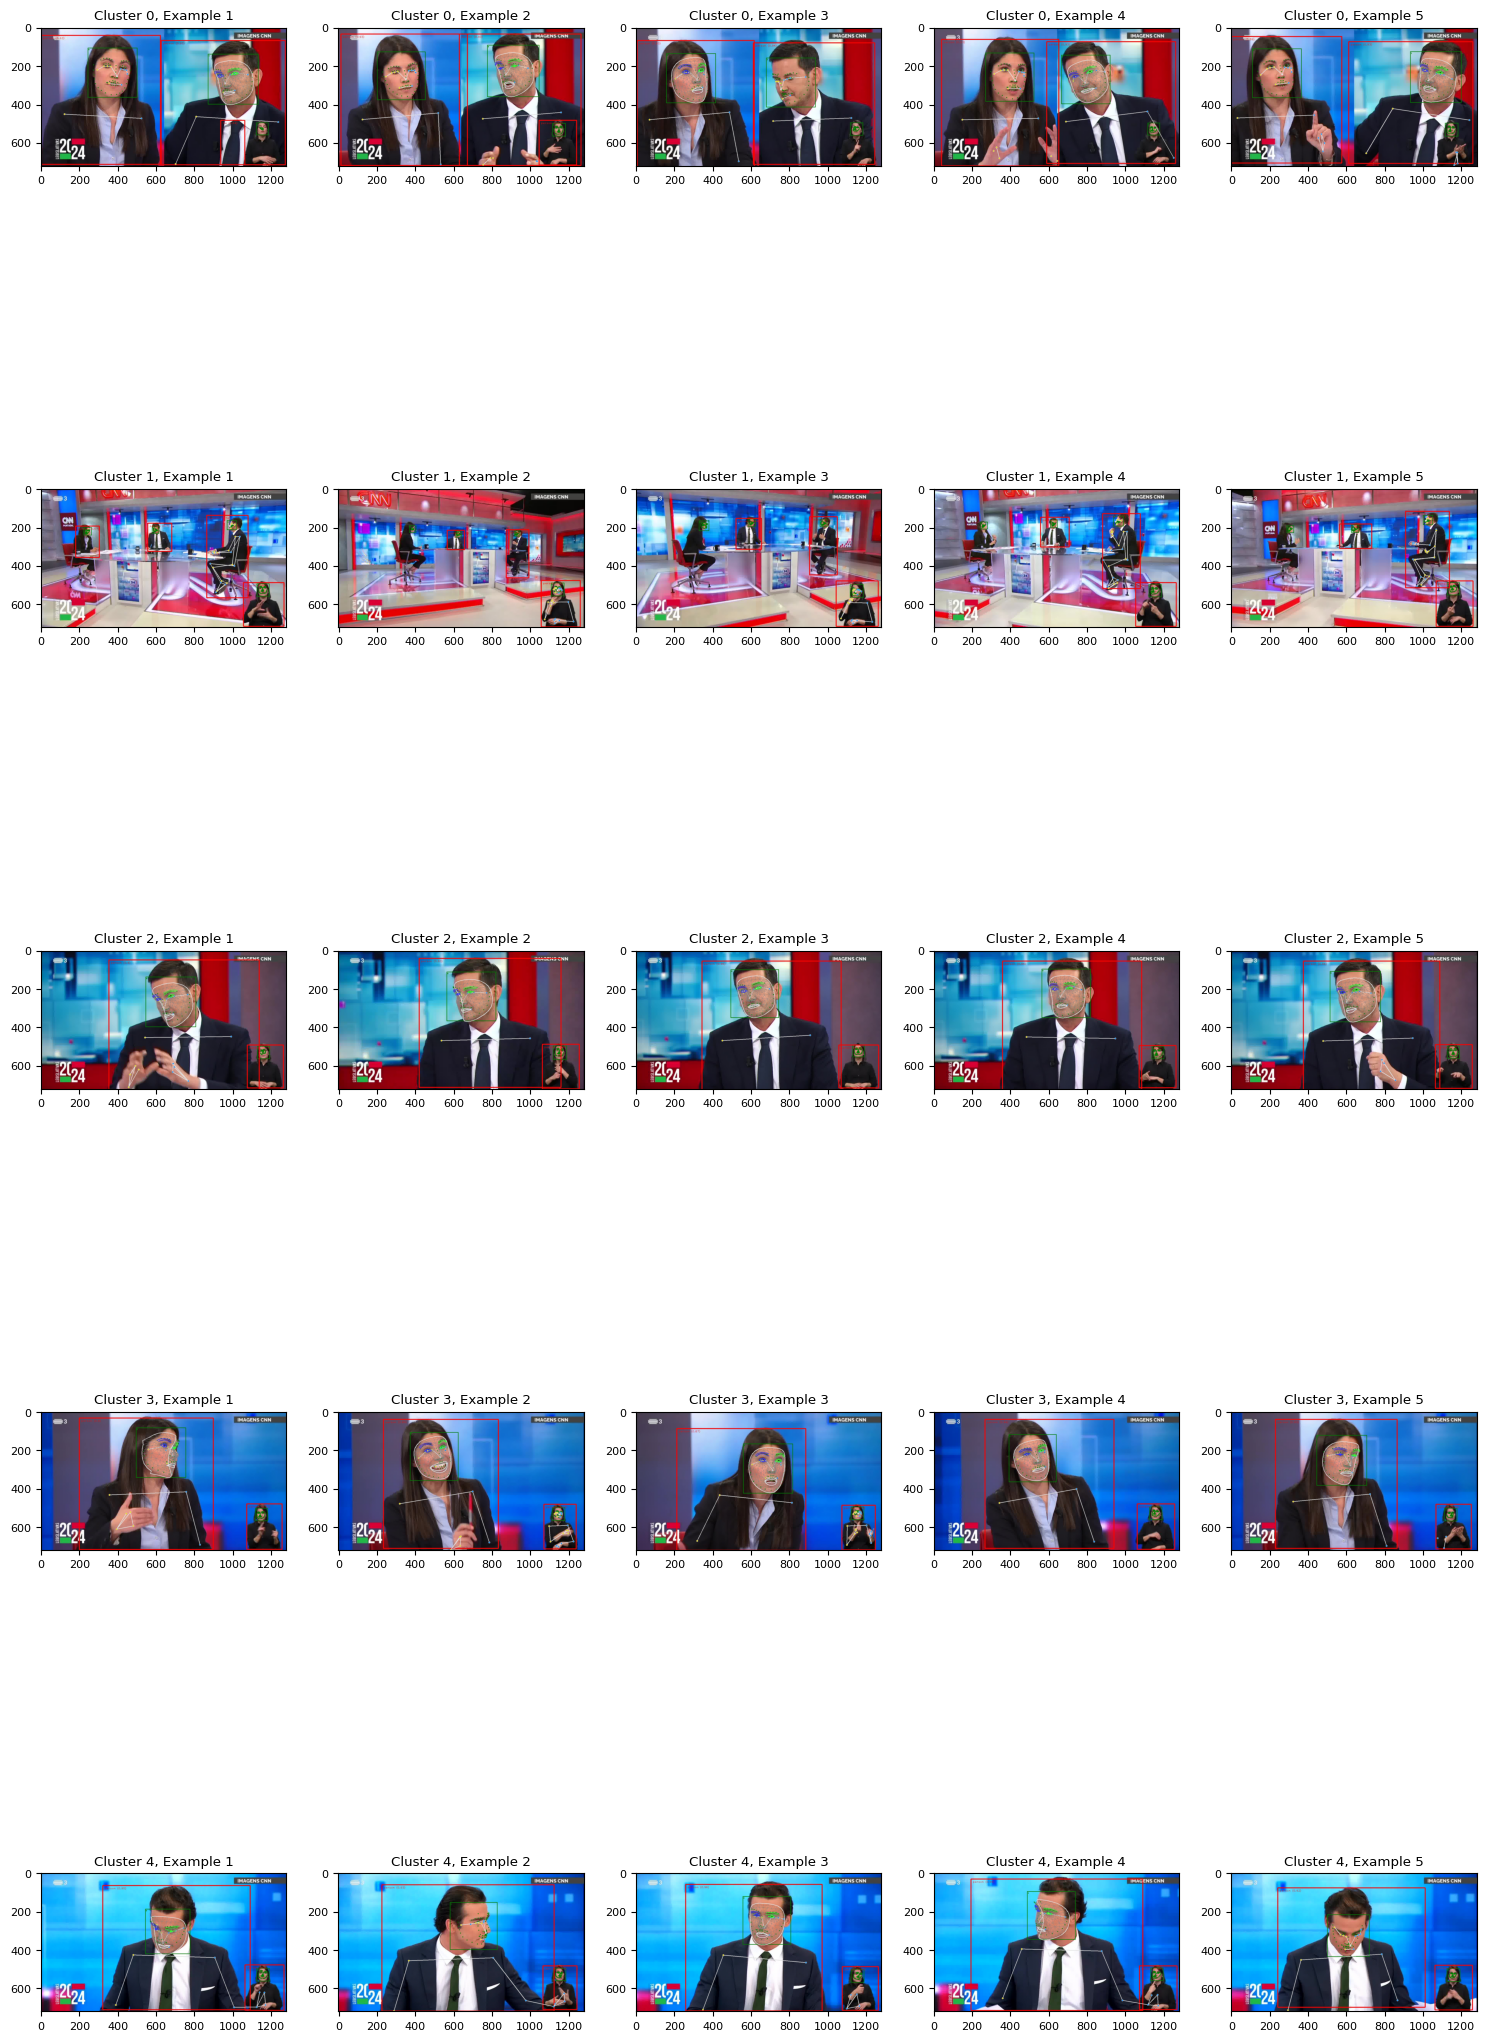

In [125]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random


num_images_per_cluster = 5


unique_clusters = np.unique(cluster_labels)

plt.figure(figsize=(15, 5 * len(unique_clusters)))


for i, cluster in enumerate(unique_clusters):

    indices = np.where(cluster_labels == cluster)[0]
    
    #Select 5 random indices from the current cluster
    random_indices = np.random.choice(indices, min(num_images_per_cluster, len(indices)), replace=False)
    

    for j, index in enumerate(random_indices):
        
        filename = data.iloc[index]['filename']
        
        
        image = plt.imread(os.path.join(r'C:\Users\User\Desktop\PBD\Code\processed\il-be', filename))
        
        plt.subplot(len(unique_clusters), num_images_per_cluster, i * num_images_per_cluster + j + 1)
        plt.imshow(image)
        plt.title(f'Cluster {cluster}, Example {j+1}')
        plt.axis('on')

plt.tight_layout()
plt.show()

#  4-Getting the location in the fer row for every cluster

In [128]:

# Extract bounding box coordinates from the 'fer' column for cluster frames
def extract_bounding_boxes(row):
    locations = []
    for face_data in row['fer']:
        location = face_data['location']
        locations.append(location)
    return locations

# Apply the function to extract bounding boxes
data['bounding_boxes'] = data.apply(extract_bounding_boxes, axis=1)

# Filter data for Cluster 0
cluster_0_indices = np.where(cluster_labels == 0)[0]
cluster_0_data = data.iloc[cluster_0_indices]

# Check extracted bounding boxes
print(cluster_0_data['bounding_boxes'].head())


cluster_1_indices = np.where(cluster_labels == 1)[0]
cluster_1_data = data.iloc[cluster_1_indices]


print("Bounding boxes for Cluster 1:")
print(cluster_1_data['bounding_boxes'].head())


cluster_2_indices = np.where(cluster_labels == 2)[0]
cluster_2_data = data.iloc[cluster_2_indices]


print("Bounding boxes for Cluster 2:")
print(cluster_2_data['bounding_boxes'].head())


cluster_3_indices = np.where(cluster_labels == 3)[0]
cluster_3_data = data.iloc[cluster_3_indices]


print("Bounding boxes for Cluster 3:")
print(cluster_3_data['bounding_boxes'].head())


cluster_4_indices = np.where(cluster_labels == 4)[0]
cluster_4_data = data.iloc[cluster_4_indices]


print("Bounding boxes for Cluster 4:")
print(cluster_4_data['bounding_boxes'].head())

1    [[774, 1036, 137, 400], [138, 393, 115, 371], ...
4    [[809, 1075, 105, 371], [192, 441, 129, 379], ...
5    [[835, 1100, 99, 364], [405, 647, 162, 405], [...
6    [[179, 427, 132, 380], [732, 985, 107, 360], [...
8    [[147, 407, 120, 380], [782, 1040, 139, 397], ...
Name: bounding_boxes, dtype: object
Bounding boxes for Cluster 1:
16    [[1122, 1191, 498, 567], [552, 596, 151, 196],...
23    [[1122, 1188, 488, 555], [961, 1001, 176, 216]...
25    [[1115, 1184, 488, 557], [190, 236, 169, 216],...
41    [[1126, 1198, 494, 567], [587, 628, 228, 269],...
43    [[1118, 1187, 495, 565], [335, 366, 226, 258],...
Name: bounding_boxes, dtype: object
Bounding boxes for Cluster 2:
7      [[563, 818, 75, 330], [1116, 1187, 497, 569]]
11     [[567, 833, 93, 359], [1124, 1188, 496, 560]]
14     [[544, 796, 89, 341], [1127, 1190, 491, 554]]
18     [[584, 837, 89, 343], [1127, 1194, 497, 565]]
21    [[520, 785, 100, 366], [1126, 1190, 491, 556]]
Name: bounding_boxes, dtype: object
Bounding box

# 5-Atribui as labels conforme as locations (para cada cluster)

In [130]:
# location of each detected face, expressed by a vector [x1, x2, y1, y2] with coordinates of two corners of a bounding box;

# Function to label speakers based on bounding box positions for Cluster 0
def label_speakers_cluster_0(bounding_boxes):
    # Sort bounding boxes by x1 coordinate (left to right), so it doesnt give wrong labels if the location isnt in crecent order
    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0])  
    print(f"Sorted boxes: {sorted_boxes}")
    labels = ['Mariana', 'Rui', 'Sign Prof']  # In this cluster only appears Mariana from BE, Rui from IL and the Sign Language Professional
    return labels

# Create a new column for labels in cluster 0 data using .loc
cluster_0_data = cluster_0_data.copy()  # Create a copy to avoid a warning
cluster_0_data.loc[:, 'labels'] = cluster_0_data['bounding_boxes'].apply(label_speakers_cluster_0)

# Check the labeled data for Cluster 0
print(cluster_0_data[['bounding_boxes', 'labels']].head())


def label_speakers_cluster_1(bounding_boxes):

    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0]) 
    print(f"Sorted boxes: {sorted_boxes}")
    labels = ['Mariana', 'Moderador', 'Rui', 'Sign Prof'] 
    return labels


cluster_1_indices = np.where(cluster_labels == 1)[0]
cluster_1_data = data.iloc[cluster_1_indices]


cluster_1_data = cluster_1_data.copy()
cluster_1_data.loc[:, 'labels'] = cluster_1_data['bounding_boxes'].apply(label_speakers_cluster_1)


print(cluster_1_data[['bounding_boxes', 'labels']].head())


def label_speakers_cluster_2(bounding_boxes):
    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0])
    print(f"Sorted boxes: {sorted_boxes}")
    labels = ['Rui', 'Sign Prof']  
    return labels

cluster_2_indices = np.where(cluster_labels == 2)[0]
cluster_2_data = data.iloc[cluster_2_indices]

cluster_2_data = cluster_2_data.copy() 
cluster_2_data.loc[:, 'labels'] = cluster_2_data['bounding_boxes'].apply(label_speakers_cluster_2)

print(cluster_2_data[['bounding_boxes', 'labels']].head())


def label_speakers_cluster_3(bounding_boxes):
    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0])
    print(f"Sorted boxes: {sorted_boxes}")
    labels = ['Mariana', 'Sign Prof']
    return labels


cluster_3_indices = np.where(cluster_labels == 3)[0]
cluster_3_data = data.iloc[cluster_3_indices]

cluster_3_data = cluster_3_data.copy()  
cluster_3_data.loc[:, 'labels'] = cluster_3_data['bounding_boxes'].apply(label_speakers_cluster_3)

print(cluster_3_data[['bounding_boxes', 'labels']].head())


def label_speakers_cluster_4(bounding_boxes):
    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0])
    print(f"Sorted boxes: {sorted_boxes}")
    labels = ['Moderador', 'Sign Prof']
    return labels


cluster_4_indices = np.where(cluster_labels == 4)[0]
cluster_4_data = data.iloc[cluster_4_indices]

cluster_4_data = cluster_4_data.copy()  
cluster_4_data.loc[:, 'labels'] = cluster_4_data['bounding_boxes'].apply(label_speakers_cluster_4)

print(cluster_4_data[['bounding_boxes', 'labels']].head())



Sorted boxes: [[138, 393, 115, 371], [774, 1036, 137, 400], [1112, 1180, 496, 564]]
Sorted boxes: [[192, 441, 129, 379], [809, 1075, 105, 371], [1112, 1182, 490, 561]]
Sorted boxes: [[405, 647, 162, 405], [835, 1100, 99, 364], [1110, 1178, 491, 559]]
Sorted boxes: [[179, 427, 132, 380], [732, 985, 107, 360], [1126, 1196, 493, 563]]
Sorted boxes: [[147, 407, 120, 380], [782, 1040, 139, 397], [1110, 1178, 496, 565]]
Sorted boxes: [[224, 483, 102, 362], [790, 1044, 110, 365], [1114, 1179, 492, 558]]
Sorted boxes: [[230, 491, 148, 410], [806, 1066, 122, 382], [1115, 1182, 500, 567]]
Sorted boxes: [[103, 352, 134, 384], [781, 1028, 105, 352], [1134, 1200, 496, 562]]
Sorted boxes: [[157, 417, 166, 426], [805, 1069, 120, 384], [1110, 1181, 495, 566]]
Sorted boxes: [[278, 540, 94, 356], [746, 1000, 154, 408], [1113, 1180, 491, 559]]
Sorted boxes: [[152, 400, 91, 340], [772, 1040, 128, 397], [1122, 1186, 489, 553]]
Sorted boxes: [[102, 339, 189, 426], [748, 988, 89, 330], [1118, 1184, 499, 566]

# 5.1-Examples of the labels per Cluster

Example 1 - Image dimensions: width=1280, height=720
Example 1 - Mariana bounding box: [244, 497, 90, 344]
Example 1 - Rui bounding box: [796, 1042, 106, 352]
Example 1 - Sign Prof bounding box: [1111, 1177, 488, 554]


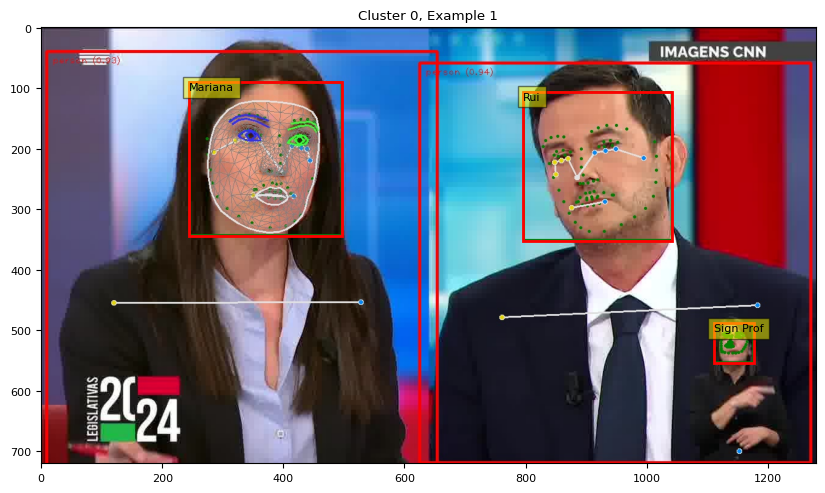

Example 2 - Image dimensions: width=1280, height=720
Example 2 - Mariana bounding box: [107, 353, 155, 402]
Example 2 - Rui bounding box: [886, 1138, 72, 325]
Example 2 - Sign Prof bounding box: [1118, 1188, 496, 566]


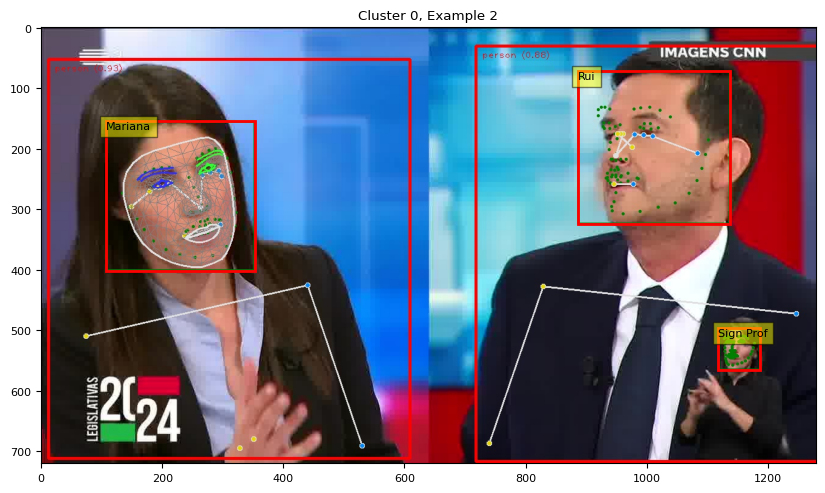

Example 3 - Image dimensions: width=1280, height=720
Example 3 - Mariana bounding box: [278, 521, 162, 405]
Example 3 - Rui bounding box: [771, 1034, 103, 366]
Example 3 - Sign Prof bounding box: [1115, 1182, 496, 563]


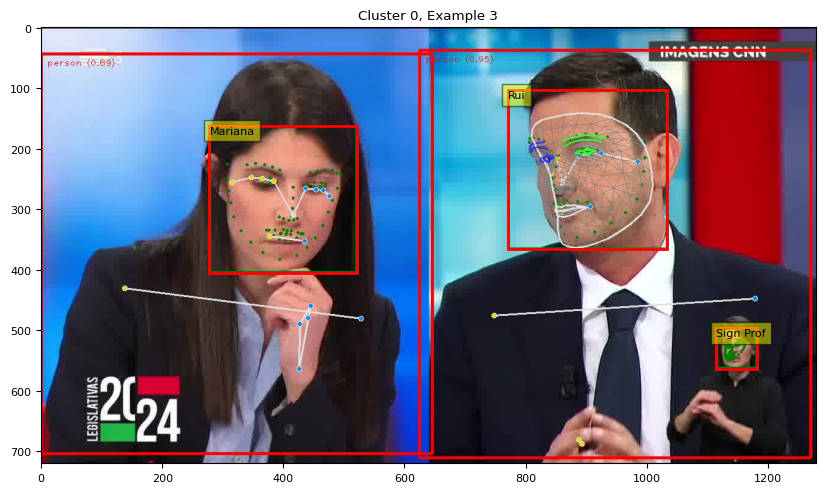

In [132]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# Set a smaller font size for the annotations
plt.rcParams.update({'font.size': 8})

num_images_per_cluster = 3

# Select random indices from cluster 0 data
random_indices = np.random.choice(cluster_0_indices, min(num_images_per_cluster, len(cluster_0_indices)), replace=False)

for j, index in enumerate(random_indices):
    filename = data.iloc[index]['filename']
    image = plt.imread(os.path.join(r'C:\Users\User\Desktop\PBD\Code\processed\il-be', filename))
    image_height, image_width = image.shape[:2]
    
    fig, ax = plt.subplots(figsize=(10, 10)) 
    ax.imshow(image)
    

    print(f"Example {j+1} - Image dimensions: width={image_width}, height={image_height}")
    

    bounding_boxes = data.iloc[index]['bounding_boxes']
    labels = cluster_0_data.loc[index, 'labels']

    # Ensure Mariana's x1 is always less than Rui's x1
    if labels == ['Mariana', 'Rui', 'Sign Prof']:
        mariana_index = labels.index('Mariana')
        rui_index = labels.index('Rui')
        
        mariana_bbox = bounding_boxes[mariana_index]
        rui_bbox = bounding_boxes[rui_index]
        
        if mariana_bbox[0] > rui_bbox[0]:
            # Swap the labels if Mariana's x1 is greater than Rui's x1
            labels[mariana_index], labels[rui_index] = labels[rui_index], labels[mariana_index]

    for bbox, label in zip(bounding_boxes, labels):
        x1, x2, y1, y2 = bbox

        print(f"Example {j+1} - {label} bounding box: {bbox}")
        

        ax.add_patch(patches.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='red', linewidth=2))
        

        text_y = y1 if y1 > 10 else y1 + 10
        ax.text(x1, text_y, label, verticalalignment='top', bbox=dict(facecolor='yellow', alpha=0.5), fontsize=8)
    
    ax.set_title(f'Cluster 0, Example {j+1}')
    ax.axis('on')
    plt.show()



Example 1 - Image dimensions: width=1280, height=720
Example 1 - Mariana bounding box: [322, 377, 160, 215]
Example 1 - Moderador bounding box: [584, 629, 143, 188]
Example 1 - Rui bounding box: [1017, 1062, 151, 196]
Example 1 - Sign Prof bounding box: [1122, 1192, 495, 565]


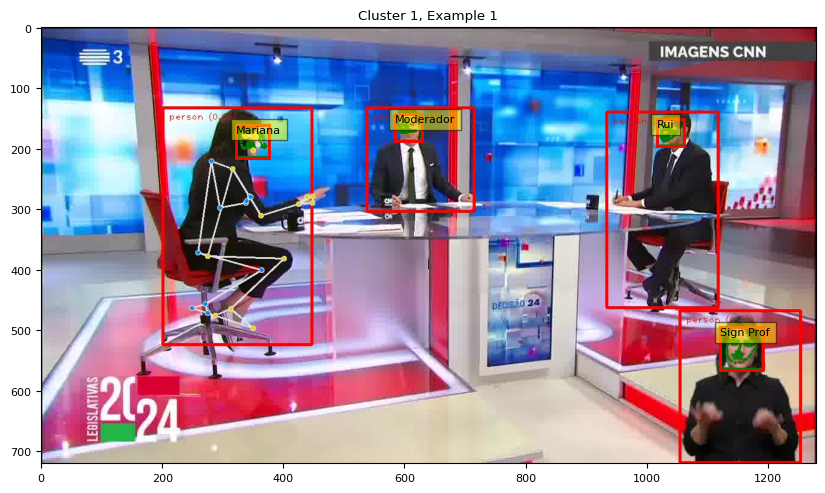

Example 2 - Image dimensions: width=1280, height=720
Example 2 - Mariana bounding box: [243, 298, 167, 223]
Example 2 - Moderador bounding box: [541, 582, 156, 197]
Example 2 - Rui bounding box: [972, 1021, 145, 194]
Example 2 - Sign Prof bounding box: [1107, 1177, 492, 562]


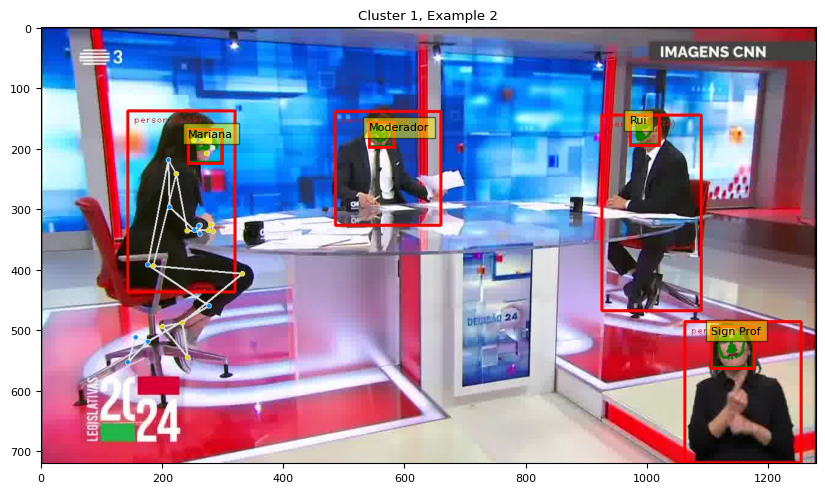

Example 3 - Image dimensions: width=1280, height=720
Example 3 - Mariana bounding box: [339, 374, 224, 259]
Example 3 - Moderador bounding box: [647, 680, 216, 250]
Example 3 - Rui bounding box: [933, 981, 192, 240]
Example 3 - Sign Prof bounding box: [1117, 1185, 489, 557]


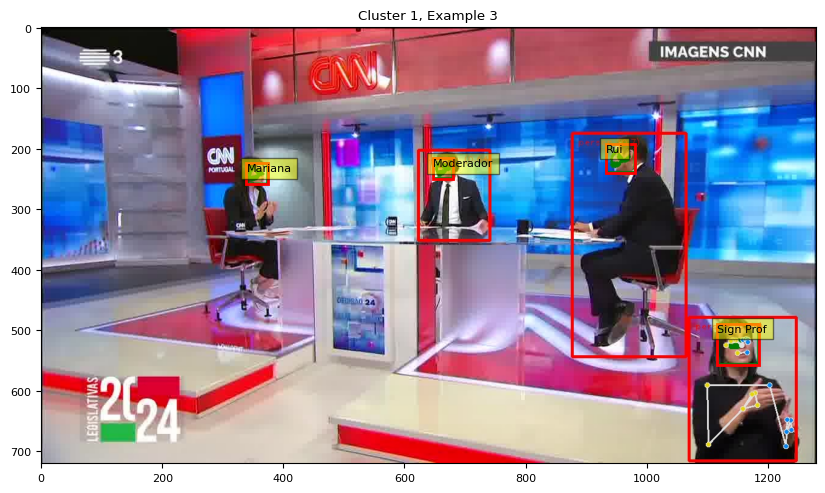

In [133]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os


plt.rcParams.update({'font.size': 8})

num_images_per_cluster = 3


random_indices = np.random.choice(cluster_1_indices, min(num_images_per_cluster, len(cluster_1_indices)), replace=False)

for j, index in enumerate(random_indices):
    filename = data.iloc[index]['filename']
    image = plt.imread(os.path.join(r'C:\Users\User\Desktop\PBD\Code\processed\il-be', filename))
    image_height, image_width = image.shape[:2]
    
    fig, ax = plt.subplots(figsize=(10, 10))  
    ax.imshow(image)
    

    print(f"Example {j+1} - Image dimensions: width={image_width}, height={image_height}")
    

    bounding_boxes = data.iloc[index]['bounding_boxes']
    labels = cluster_1_data.loc[index, 'labels']


    if labels == ['Mariana', 'Moderador', 'Rui', 'Sign Prof']:

        sorted_indices = sorted(range(len(bounding_boxes)), key=lambda i: bounding_boxes[i][0])
        sorted_bounding_boxes = [bounding_boxes[i] for i in sorted_indices]
        sorted_labels = [labels[i] for i in sorted_indices]


        sorted_labels[0] = 'Mariana'
        sorted_labels[1] = 'Moderador'
        sorted_labels[2] = 'Rui'
        sorted_labels[3] = 'Sign Prof'

        bounding_boxes = sorted_bounding_boxes
        labels = sorted_labels

    for bbox, label in zip(bounding_boxes, labels):
        x1, x2, y1, y2 = bbox

        print(f"Example {j+1} - {label} bounding box: {bbox}")
        

        ax.add_patch(patches.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='red', linewidth=2))
        

        text_y = y1 if y1 > 10 else y1 + 10
        ax.text(x1, text_y, label, verticalalignment='top', bbox=dict(facecolor='yellow', alpha=0.5), fontsize=8)
    
    ax.set_title(f'Cluster 1, Example {j+1}')
    ax.axis('on')  
    plt.show()



Example 1 - Image dimensions: width=1280, height=720
Example 1 - Rui bounding box: [587, 845, 70, 328]
Example 1 - Sign Prof bounding box: [1125, 1186, 491, 553]


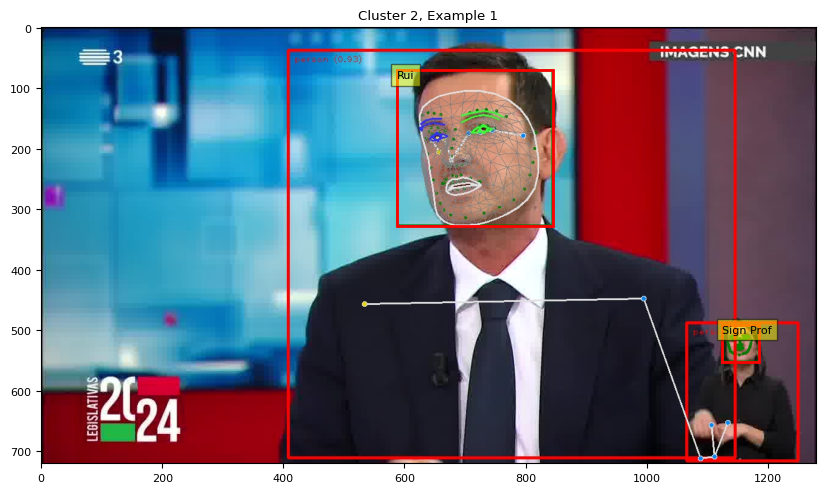

Example 2 - Image dimensions: width=1280, height=720
Example 2 - Rui bounding box: [503, 750, 87, 335]
Example 2 - Sign Prof bounding box: [1130, 1197, 498, 566]


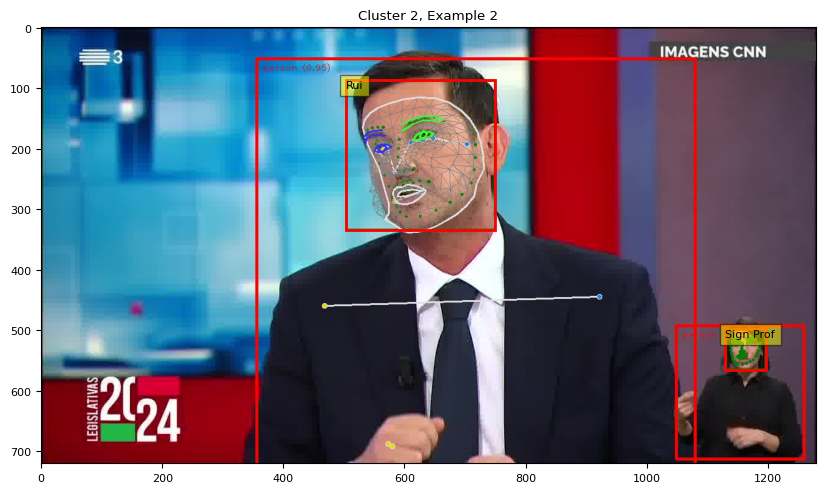

Example 3 - Image dimensions: width=1280, height=720
Example 3 - Rui bounding box: [418, 686, 102, 371]
Example 3 - Sign Prof bounding box: [1126, 1193, 503, 570]


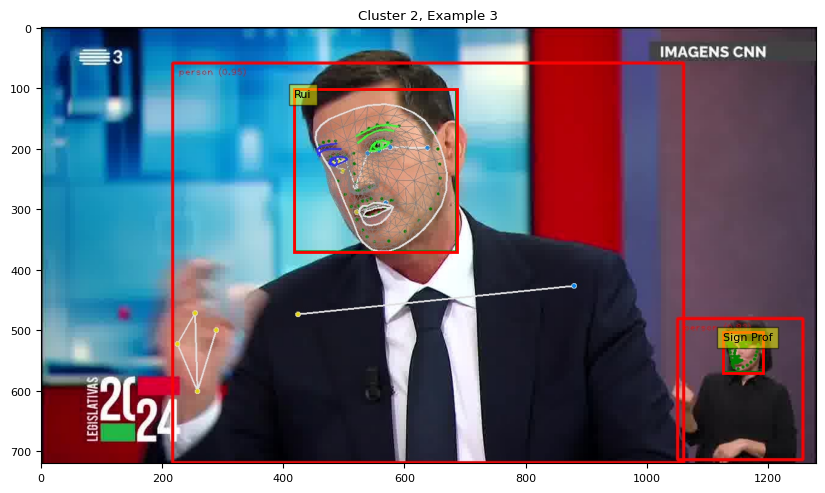

In [134]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os


plt.rcParams.update({'font.size': 8})

num_images_per_cluster = 3


random_indices = np.random.choice(cluster_2_indices, min(num_images_per_cluster, len(cluster_2_indices)), replace=False)

for j, index in enumerate(random_indices):
    filename = data.iloc[index]['filename']
    image = plt.imread(os.path.join(r'C:\Users\User\Desktop\PBD\Code\processed\il-be', filename))
    image_height, image_width = image.shape[:2]
    
    fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size of the window
    ax.imshow(image)
    

    print(f"Example {j+1} - Image dimensions: width={image_width}, height={image_height}")
    
    # Annotate with labels
    bounding_boxes = data.iloc[index]['bounding_boxes']
    labels = cluster_2_data.loc[index, 'labels']


    if labels == ['Mariana', 'Moderador', 'Rui', 'Sign Prof']:
        sorted_indices = sorted(range(len(bounding_boxes)), key=lambda i: bounding_boxes[i][0])
        sorted_bounding_boxes = [bounding_boxes[i] for i in sorted_indices]
        sorted_labels = [labels[i] for i in sorted_indices]


        sorted_labels[0] = 'Rui'
        sorted_labels[-1] = 'Sign Prof'
        

        remaining_labels = ['Mariana', 'Moderador']
        remaining_sorted_indices = [i for i in range(len(sorted_labels)) if sorted_labels[i] not in ['Rui', 'Sign Prof']]
        for k, remaining_label in enumerate(remaining_labels):
            sorted_labels[remaining_sorted_indices[k]] = remaining_label

        bounding_boxes = sorted_bounding_boxes
        labels = sorted_labels

    for bbox, label in zip(bounding_boxes, labels):
        x1, x2, y1, y2 = bbox

        print(f"Example {j+1} - {label} bounding box: {bbox}")
        

        ax.add_patch(patches.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='red', linewidth=2))
        

        text_y = y1 if y1 > 10 else y1 + 10
        ax.text(x1, text_y, label, verticalalignment='top', bbox=dict(facecolor='yellow', alpha=0.5), fontsize=8)
    
    ax.set_title(f'Cluster 2, Example {j+1}')
    ax.axis('on') 
    plt.show()



Example 1 - Image dimensions: width=1280, height=720
Example 1 - Mariana bounding box: [509, 766, 98, 355]
Example 1 - Sign Prof bounding box: [1107, 1173, 498, 564]


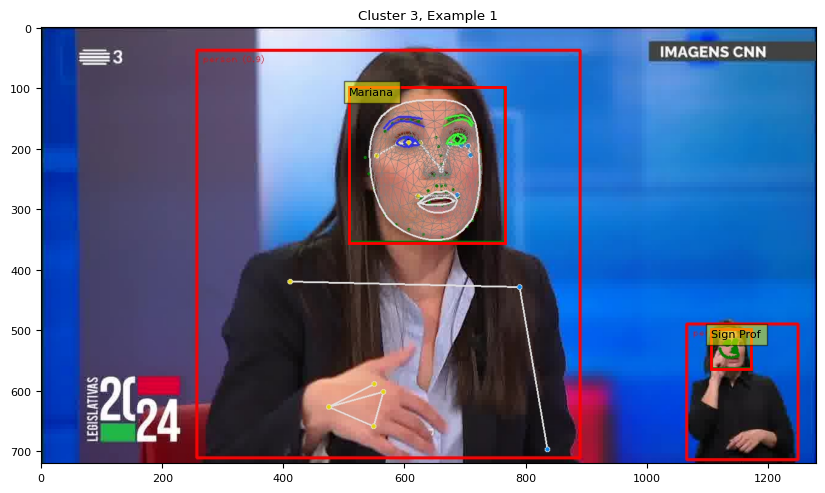

Example 2 - Image dimensions: width=1280, height=720
Example 2 - Mariana bounding box: [465, 726, 103, 364]
Example 2 - Sign Prof bounding box: [1121, 1191, 492, 562]


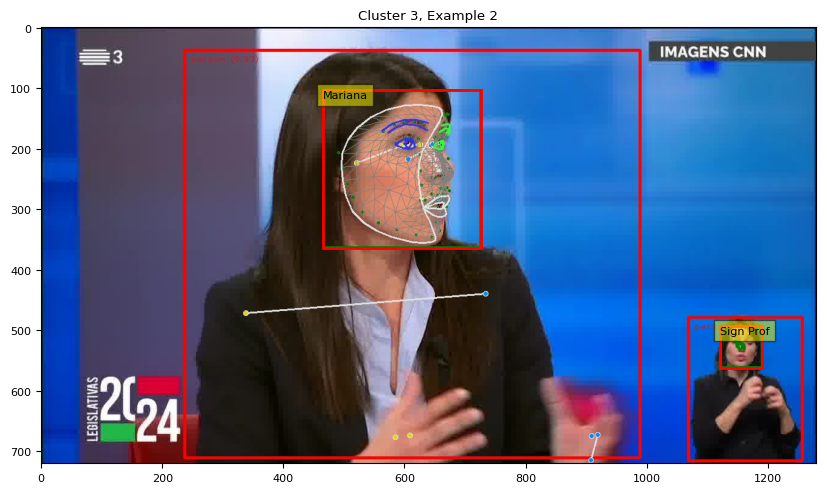

Example 3 - Image dimensions: width=1280, height=720
Example 3 - Mariana bounding box: [479, 727, 89, 338]
Example 3 - Sign Prof bounding box: [1115, 1184, 495, 565]


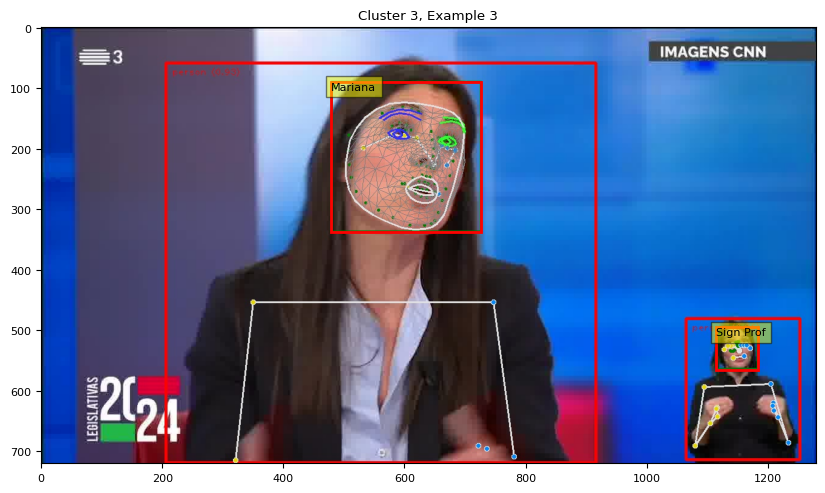

In [145]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os


plt.rcParams.update({'font.size': 8})

num_images_per_cluster = 3


random_indices = np.random.choice(cluster_3_indices, min(num_images_per_cluster, len(cluster_3_indices)), replace=False)

for j, index in enumerate(random_indices):
    filename = data.iloc[index]['filename']
    image = plt.imread(os.path.join(r'C:\Users\User\Desktop\PBD\Code\processed\il-be', filename))
    image_height, image_width = image.shape[:2]
    
    fig, ax = plt.subplots(figsize=(10, 10))  
    ax.imshow(image)
    

    print(f"Example {j+1} - Image dimensions: width={image_width}, height={image_height}")
    

    bounding_boxes = data.iloc[index]['bounding_boxes']
    labels = cluster_3_data.loc[index, 'labels']


    if labels == ['Mariana', 'Moderador', 'Rui', 'Sign Prof']:
        sorted_indices = sorted(range(len(bounding_boxes)), key=lambda i: bounding_boxes[i][0])
        sorted_bounding_boxes = [bounding_boxes[i] for i in sorted_indices]
        sorted_labels = [labels[i] for i in sorted_indices]


        sorted_labels[0] = 'Mariana'
        sorted_labels[-1] = 'Sign Prof'
        

        remaining_labels = ['Moderador', 'Rui']
        remaining_sorted_indices = [i for i in range(len(sorted_labels)) if sorted_labels[i] not in ['Mariana', 'Sign Prof']]
        for k, remaining_label in enumerate(remaining_labels):
            sorted_labels[remaining_sorted_indices[k]] = remaining_label

        bounding_boxes = sorted_bounding_boxes
        labels = sorted_labels

    for bbox, label in zip(bounding_boxes, labels):
        x1, x2, y1, y2 = bbox

        print(f"Example {j+1} - {label} bounding box: {bbox}")
        

        ax.add_patch(patches.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='red', linewidth=2))
        

        text_y = y1 if y1 > 10 else y1 + 10
        ax.text(x1, text_y, label, verticalalignment='top', bbox=dict(facecolor='yellow', alpha=0.5), fontsize=8)
    
    ax.set_title(f'Cluster 3, Example {j+1}')
    ax.axis('on')  
    plt.show()


Example 1 - Image dimensions: width=1280, height=720
Example 1 - Moderador bounding box: [532, 754, 219, 441]
Example 1 - Sign Prof bounding box: [1119, 1188, 493, 562]


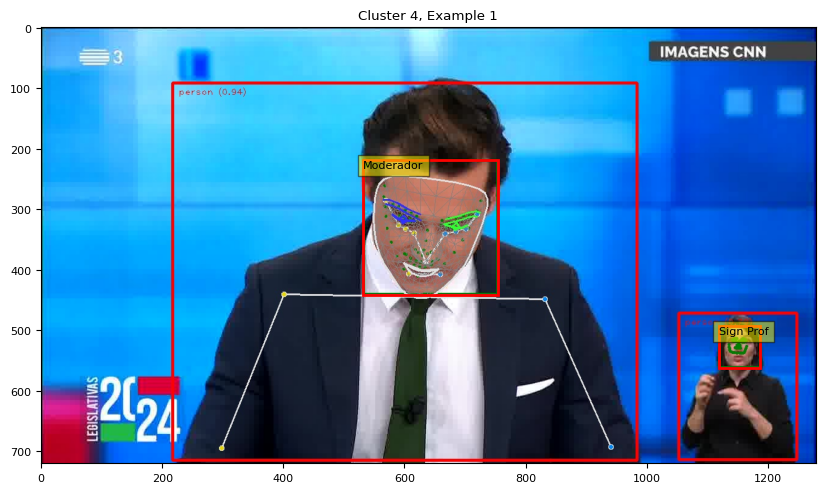

Example 2 - Image dimensions: width=1280, height=720
Example 2 - Moderador bounding box: [1121, 1189, 489, 557]
Example 2 - Sign Prof bounding box: [561, 809, 119, 367]


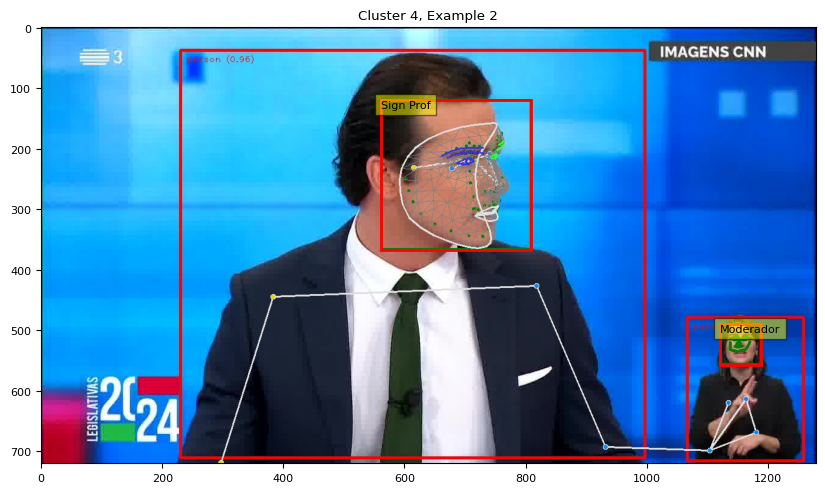

Example 3 - Image dimensions: width=1280, height=720
Example 3 - Moderador bounding box: [497, 723, 196, 423]
Example 3 - Sign Prof bounding box: [1126, 1196, 497, 567]


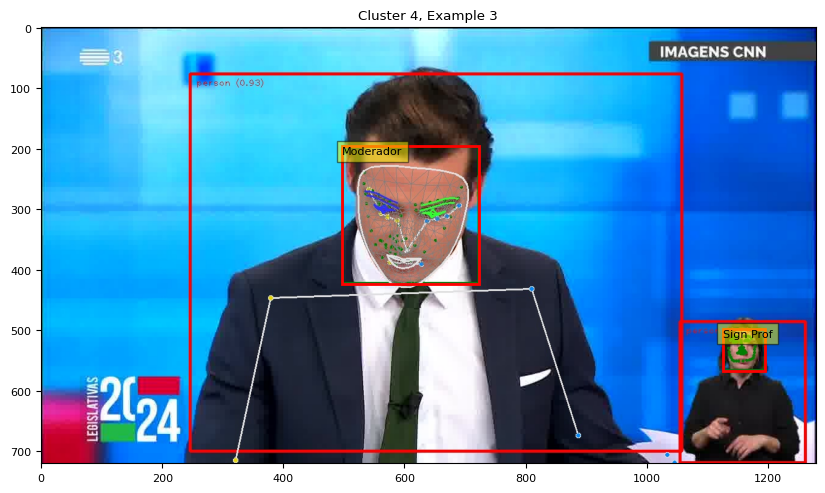

In [141]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os


plt.rcParams.update({'font.size': 8})

num_images_per_cluster = 3


random_indices = np.random.choice(cluster_4_indices, min(num_images_per_cluster, len(cluster_4_indices)), replace=False)

for j, index in enumerate(random_indices):
    filename = data.iloc[index]['filename']
    image = plt.imread(os.path.join(r'C:\Users\User\Desktop\PBD\Code\processed\il-be', filename))
    image_height, image_width = image.shape[:2]
    
    fig, ax = plt.subplots(figsize=(10, 10))  
    ax.imshow(image)
    

    print(f"Example {j+1} - Image dimensions: width={image_width}, height={image_height}")
    

    bounding_boxes = data.iloc[index]['bounding_boxes']
    labels = cluster_4_data.loc[index, 'labels']


    if labels == ['Mariana', 'Moderador', 'Rui', 'Sign Prof']:
        sorted_indices = sorted(range(len(bounding_boxes)), key=lambda i: bounding_boxes[i][0])
        sorted_bounding_boxes = [bounding_boxes[i] for i in sorted_indices]
        sorted_labels = [labels[i] for i in sorted_indices]


        sorted_labels[0] = 'Moderador'
        sorted_labels[-1] = 'Sign Prof'
        

        remaining_labels = ['Mariana', 'Rui']
        remaining_sorted_indices = [i for i in range(len(sorted_labels)) if sorted_labels[i] not in ['Moderador', 'Sign Prof']]
        for k, remaining_label in enumerate(remaining_labels):
            sorted_labels[remaining_sorted_indices[k]] = remaining_label

        bounding_boxes = sorted_bounding_boxes
        labels = sorted_labels

    for bbox, label in zip(bounding_boxes, labels):
        x1, x2, y1, y2 = bbox

        print(f"Example {j+1} - {label} bounding box: {bbox}")
        

        ax.add_patch(patches.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='red', linewidth=2))
        

        text_y = y1 if y1 > 10 else y1 + 10
        ax.text(x1, text_y, label, verticalalignment='top', bbox=dict(facecolor='yellow', alpha=0.5), fontsize=8)
    
    ax.set_title(f'Cluster 4, Example {j+1}')
    ax.axis('on')  
    plt.show()


# 6-Gets the emotion and stores for each Cluster

In [148]:
import numpy as np
import pandas as pd
from collections import Counter

# Function to label speakers based on bounding box positions for Cluster 0
def label_speakers_cluster_0(bounding_boxes):
    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0])  
    labels = ['Mariana', 'Rui', 'Sign Prof']  
    return labels


def label_speakers_cluster_1(bounding_boxes):
    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0])
    labels = ['Mariana', 'Moderador', 'Rui', 'Sign Prof']
    return labels


def label_speakers_cluster_2(bounding_boxes):
    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0])
    labels = ['Rui', 'Sign Prof']
    return labels


def label_speakers_cluster_3(bounding_boxes):
    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0])
    labels = ['Mariana', 'Sign Prof']
    return labels


def label_speakers_cluster_4(bounding_boxes):
    sorted_boxes = sorted(bounding_boxes, key=lambda x: x[0])
    labels = ['Moderador', 'Sign Prof']
    return labels

# Function to extract emotions and associate them with speakers
def extract_emotions(data, cluster_labels, cluster_number):
    emotions_per_speaker = {'Mariana': [], 'Moderador': [], 'Rui': [], 'Sign Prof': []}

    cluster_indices = np.where(cluster_labels == cluster_number)[0]
    cluster_data = data.iloc[cluster_indices]

    for index, row in cluster_data.iterrows():
        bounding_boxes = row['bounding_boxes']
        emotions = [face_data['emotion'] for face_data in row['fer']]
        labels = row['labels']


        if isinstance(labels, list) and isinstance(emotions, list):

            if cluster_number == 0 and labels == ['Mariana', 'Rui', 'Sign Prof']:
                mariana_index = labels.index('Mariana')
                rui_index = labels.index('Rui')
                if bounding_boxes[mariana_index][0] > bounding_boxes[rui_index][0]:
                    # Swap the labels if Mariana's x1 is greater than Rui's x1
                    labels[mariana_index], labels[rui_index] = labels[rui_index], labels[mariana_index]
                    emotions[mariana_index], emotions[rui_index] = emotions[rui_index], emotions[mariana_index]

            for label, emotion in zip(labels, emotions):
                if label in emotions_per_speaker:
                    emotions_per_speaker[label].append(emotion)

    return emotions_per_speaker

# Add labels to cluster data
for cluster_number in range(len(np.unique(cluster_labels))):
    if cluster_number == 0:
        cluster_indices = np.where(cluster_labels == cluster_number)[0]
        cluster_data = data.iloc[cluster_indices].copy()
        cluster_data.loc[:, 'labels'] = cluster_data['bounding_boxes'].apply(label_speakers_cluster_0)
        data.loc[cluster_indices, 'labels'] = cluster_data['labels']
    elif cluster_number == 1:
        cluster_indices = np.where(cluster_labels == cluster_number)[0]
        cluster_data = data.iloc[cluster_indices].copy()
        cluster_data.loc[:, 'labels'] = cluster_data['bounding_boxes'].apply(label_speakers_cluster_1)
        data.loc[cluster_indices, 'labels'] = cluster_data['labels']
    elif cluster_number == 2:
        cluster_indices = np.where(cluster_labels == cluster_number)[0]
        cluster_data = data.iloc[cluster_indices].copy()
        cluster_data.loc[:, 'labels'] = cluster_data['bounding_boxes'].apply(label_speakers_cluster_2)
        data.loc[cluster_indices, 'labels'] = cluster_data['labels']
    elif cluster_number == 3:
        cluster_indices = np.where(cluster_labels == cluster_number)[0]
        cluster_data = data.iloc[cluster_indices].copy()
        cluster_data.loc[:, 'labels'] = cluster_data['bounding_boxes'].apply(label_speakers_cluster_3)
        data.loc[cluster_indices, 'labels'] = cluster_data['labels']
    elif cluster_number == 4:
        cluster_indices = np.where(cluster_labels == cluster_number)[0]
        cluster_data = data.iloc[cluster_indices].copy()
        cluster_data.loc[:, 'labels'] = cluster_data['bounding_boxes'].apply(label_speakers_cluster_4)
        data.loc[cluster_indices, 'labels'] = cluster_data['labels']


num_clusters = len(np.unique(cluster_labels))


all_emotions_per_speaker = []
for cluster_number in range(num_clusters):
    emotions_per_speaker = extract_emotions(data, cluster_labels, cluster_number)
    all_emotions_per_speaker.append(emotions_per_speaker)


def count_emotions(emotions_per_speaker):
    counts_per_speaker = {}
    for speaker, emotions in emotions_per_speaker.items():
        counts_per_speaker[speaker] = dict(Counter(emotions))
    return counts_per_speaker

for cluster_number, emotions_per_speaker in enumerate(all_emotions_per_speaker):
    counts_per_speaker = count_emotions(emotions_per_speaker)
    print(f"Cluster {cluster_number} Emotions:")
    for speaker, counts in counts_per_speaker.items():
        print(f"{speaker}: {counts}")



Cluster 0 Emotions:
Mariana: {'Happiness': 3, 'Surprise': 374, 'Contempt': 150, 'Neutral': 256, 'Sadness': 47, 'Disgust': 25, 'Fear': 18, 'Anger': 13}
Moderador: {}
Rui: {'Surprise': 276, 'Sadness': 98, 'Neutral': 303, 'Contempt': 167, 'Disgust': 18, 'Fear': 7, 'Anger': 8, 'Happiness': 9}
Sign Prof: {'Sadness': 454, 'Neutral': 94, 'Fear': 193, 'Disgust': 26, 'Surprise': 111, 'Contempt': 4, 'Anger': 3, 'Happiness': 1}
Cluster 1 Emotions:
Mariana: {'Sadness': 54, 'Surprise': 15, 'Fear': 15, 'Neutral': 18, 'Anger': 1, 'Disgust': 3}
Moderador: {'Disgust': 26, 'Neutral': 32, 'Sadness': 19, 'Anger': 16, 'Fear': 9, 'Surprise': 4}
Rui: {'Sadness': 18, 'Anger': 10, 'Neutral': 43, 'Disgust': 21, 'Surprise': 9, 'Fear': 5}
Sign Prof: {'Fear': 18, 'Surprise': 22, 'Disgust': 7, 'Neutral': 35, 'Sadness': 11}
Cluster 2 Emotions:
Mariana: {}
Moderador: {}
Rui: {'Neutral': 237, 'Surprise': 163, 'Disgust': 21, 'Sadness': 29, 'Contempt': 15, 'Fear': 5, 'Happiness': 2, 'Anger': 2}
Sign Prof: {'Surprise': 6

# 7-Sums the emotions of each speaker in each cluster

In [149]:
from collections import Counter

# Function to aggregate and add emotions from all clusters
def aggregate_and_sum_emotions(all_emotions_per_speaker):
    aggregated_emotions = {'Mariana': Counter(), 'Moderador': Counter(), 'Rui': Counter(), 'Sign Prof': Counter()}

    for emotions_per_speaker in all_emotions_per_speaker:
        for speaker, emotions in emotions_per_speaker.items():
            aggregated_emotions[speaker].update(emotions)

    # Convert Counter to dictionary for more readable output
    aggregated_emotions = {speaker: dict(emotion_counts) for speaker, emotion_counts in aggregated_emotions.items()}
    return aggregated_emotions


aggregated_emotions = aggregate_and_sum_emotions(all_emotions_per_speaker)

# Print the aggregated and summed emotions for each speaker
print("Aggregated Emotions for All Speakers Across All Clusters:")
for speaker, emotion_counts in aggregated_emotions.items():
    print(f"{speaker}: {emotion_counts}")


Aggregated Emotions for All Speakers Across All Clusters:
Mariana: {'Happiness': 4, 'Surprise': 596, 'Contempt': 173, 'Neutral': 328, 'Sadness': 128, 'Disgust': 32, 'Fear': 38, 'Anger': 15}
Moderador: {'Disgust': 30, 'Neutral': 50, 'Sadness': 62, 'Anger': 33, 'Fear': 16, 'Surprise': 22, 'Contempt': 5}
Rui: {'Surprise': 448, 'Sadness': 145, 'Neutral': 583, 'Contempt': 182, 'Disgust': 60, 'Fear': 17, 'Anger': 20, 'Happiness': 11}
Sign Prof: {'Sadness': 886, 'Neutral': 259, 'Fear': 345, 'Disgust': 71, 'Surprise': 290, 'Contempt': 6, 'Anger': 26, 'Happiness': 3}


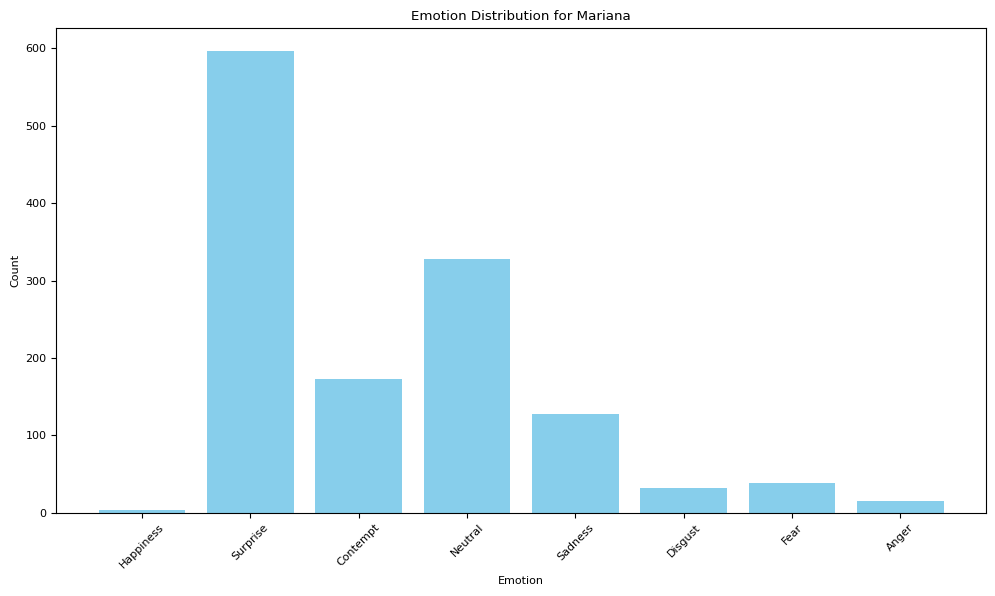

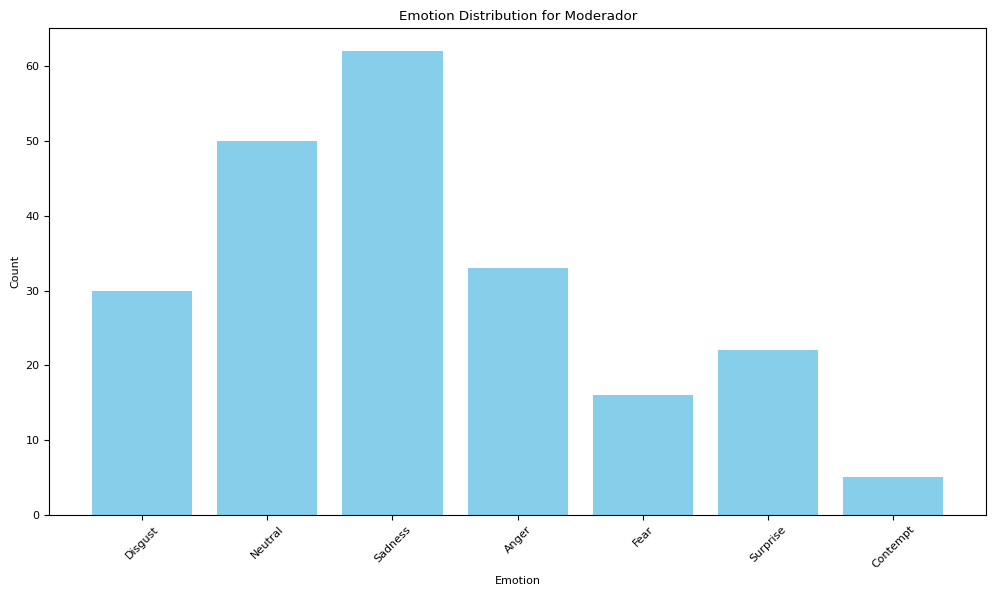

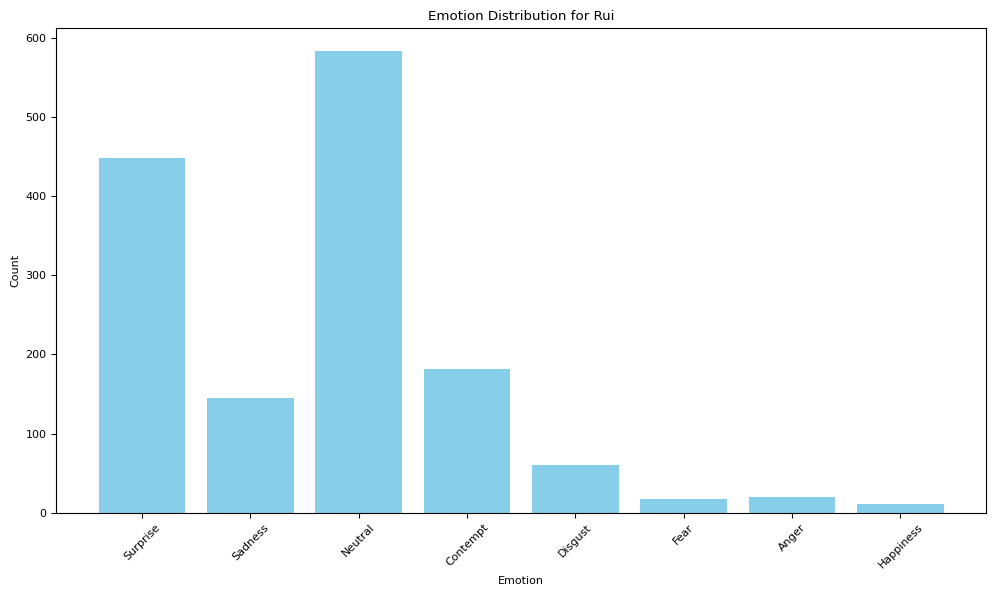

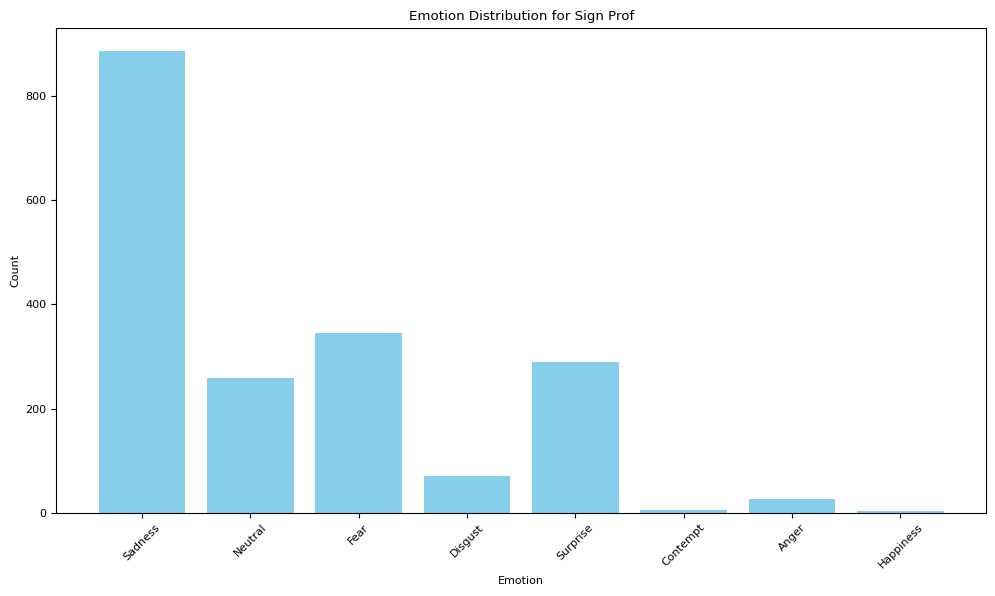

In [150]:
import matplotlib.pyplot as plt


def plot_histograms(aggregated_emotions):
    for speaker, emotion_counts in aggregated_emotions.items():
        emotions = list(emotion_counts.keys())
        counts = list(emotion_counts.values())
        
        plt.figure(figsize=(10, 6))
        plt.bar(emotions, counts, color='skyblue')
        plt.title(f'Emotion Distribution for {speaker}')
        plt.xlabel('Emotion')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Plot histogram for each speaker
plot_histograms(aggregated_emotions)


